# Image Captioning Project

## Exploring the dataset

---

This project builds on the Microsoft **C**ommon **O**bjects in **CO**ntext (MS COCO) dataset The dataset is commonly used to train and benchmark object detection, segmentation, and captioning algorithms.  

![Sample Dog Output](images/coco-examples.jpg)

You can read more about the dataset on the [website](http://cocodataset.org/#home) or in the [research paper](https://arxiv.org/pdf/1405.0312.pdf).


## Step 1: Initialize the COCO API

We begin by initializing the [COCO API](https://github.com/cocodataset/cocoapi) that you will use to obtain the data.

In [10]:
import os
import sys
sys.path.append(r'C:\Users\Project\Documents\Python Scripts\Github_Clone\cocoapi-master\PythonAPI')
from pycocotools.coco import COCO

# initialize COCO API for instance annotations
# This project builds on the Validation dataset since it's relatively smaller than the training dataset.
dataDir = r'C:\Users\Project\Documents\Python Scripts\Github_Clone\cocoapi-master'
dataType = r'val2014'
instances_annFile = os.path.join(dataDir, r'annotations\instances_{}.json'.format(dataType))
coco = COCO(instances_annFile)

# initialize COCO API for caption annotations
captions_annFile = os.path.join(dataDir, r'annotations\captions_{}.json'.format(dataType))
coco_caps = COCO(captions_annFile)

# get image ids 
ids = list(coco.anns.keys())

loading annotations into memory...
Done (t=6.75s)
creating index...
index created!
loading annotations into memory...
Done (t=0.41s)
creating index...
index created!


## Step 2: Plot a Sample Image

Next, we plot a random image from the dataset, along with its five corresponding captions.  Each time you run the code cell below, a different image is selected.  

In the project, you will use this dataset to train your own model to generate captions from images!

http://images.cocodataset.org/val2014/COCO_val2014_000000244462.jpg


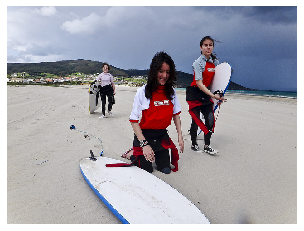

The three girls have surfboards on the beach.
3 female surfers with their boards at the beach
Three people with surfboards on the sandy beach.
A woman kneeling next to a white snowboard on the sand.
Women are getting ready to surf on a stormy day.


In [13]:
import numpy as np
import skimage.io as io
import matplotlib.pyplot as plt
%matplotlib inline

# pick a random image and obtain the corresponding URL
ann_id = np.random.choice(ids)
img_id = coco.anns[ann_id]['image_id']
img = coco.loadImgs(img_id)[0]
url = img['coco_url']

# print URL and visualize corresponding image
print(url)
I = io.imread(url)
plt.axis('off')
plt.imshow(I)
plt.show()

# load and display captions
annIds = coco_caps.getAnnIds(imgIds=img['id']);
anns = coco_caps.loadAnns(annIds)
coco_caps.showAnns(anns)

## Step 3: Our model architecture

In this project, We have a <span style="color:cyan">**CNN**</span>-<span style="color:green">**RNN**</span>encoder-decoder architecture where the <span style="color:cyan">**CNN**</span> encodes the image into a <span style="color:red">**feature_vector of a fixed size (embed_size)**</span>. The decoder (<span style="color:green">**RNN**</span>) receives the feature_vector and generates a sequence of words that described the content in the input image.

The below image demonstrate the end-to-end training process of the model where the image feed to the model and it’s output are compared with the ground-truth captioning to compute loss. Details of the architecture are discussed in model.py file.

![Image Captioning CNN-RNN model](images/encoder-decoder.png)